# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [1]:
#implement elbow method from scratch
def elbow(X):
    Var=[]
    K=[]
    for k in range(2,21):
        K.append(k)
        kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
        lab = kmeans.labels_
        cent = kmeans.cluster_centers_
        v=0
        for i,l in enumerate(lab):
            v+=np.sum((X[i] - cent[l])**2)
        v/=len(lab)
        Var.append(v)
    plt.plot(K,Var)
    plt.scatter(K,Var)
            
            
        
        
        
        


In [2]:
#implement silhouette method from scratch
from tqdm import tqdm
def silhouette(X):
    Var=[]
    K=[]
    for k in range(2,20):
        K.append(k)
        kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
        lab = kmeans.labels_
        cent = kmeans.cluster_centers_
        clusters =[[] for i in range(k)]
        for i,l in enumerate(lab):
            clusters[l].append(X[i])
        print(len(clusters))
        sil_score=0
        for i,x in enumerate(X):
            curr_cluster = lab[i]
            mindist=1e9
            closest_cluster=-1
            for j in range(k):
                if j!=lab[i]:
                    dist=np.sum((x-cent[j])**2)
                    if(dist<mindist):
                        mindist=dist
                        closest_cluster=j
            a = np.sum(np.array([np.sum((x-y)**2) for y in clusters[curr_cluster]]))/(len(clusters[curr_cluster])-1)
            b = np.sum(np.array([np.sum((x-y)**2) for y in clusters[closest_cluster]]))/(len(clusters[closest_cluster])-1)
            sil_score+=(b-a)/max(a,b)
        sil_score/=len(X)
        print(sil_score)
        Var.append(sil_score)
    plt.plot(K,Var)
    plt.scatter(K,Var)



2023-03-01 22:11:27.140111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 22:11:27.754137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-01 22:11:27.754198: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-01 22:11:27.754205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


((60000, 784), (60000,), (10000, 784), (10000,))

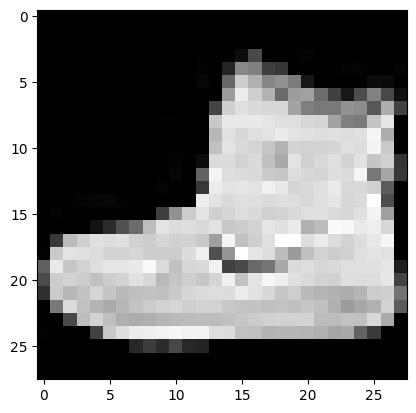

In [3]:
# LOADING THE DATASET. Take only the test split (10000 samples)
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
VectrainX, VectestX= trainX.reshape(trainX.shape[0] , -1), testX.reshape(testX.shape[0] , -1)
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)
plt.imshow(VectrainX[0].reshape(28,28), cmap='gray')
VectrainX.shape, trainy.shape , VectestX.shape, testy.shape


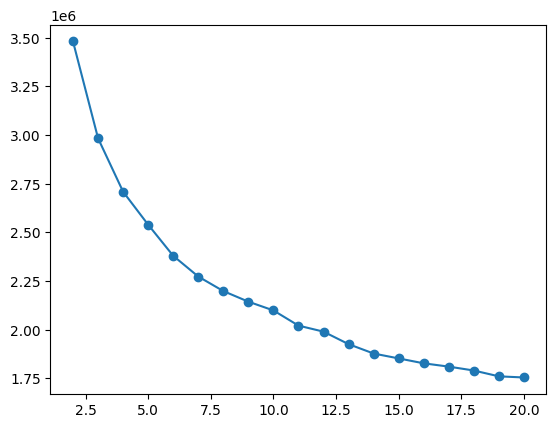

In [4]:
# Perform KMeans using sklearn's KMeans. (Perform appropriate scaling)
from sklearn.cluster import KMeans
import numpy as np
K = 8
elbow(X)

Ideal k is 2

2
0.07412255445065626
3
0.0886912447286946
4
0.059989479349229304
5
0.047881748206853404
6
0.08746074628331325
7
0.10356624880578015
8
0.08386574122661582
9
0.0818157162044686
10
0.0777828271270884
11
0.07073467391246197
12
0.0618337263185818
13
0.055932427062132285
14
0.05157775938728993
15
0.048577440416776675
16
0.05492348024579552
17
0.05549775321365627
18
0.055458097073025625
19
0.04163896959788704


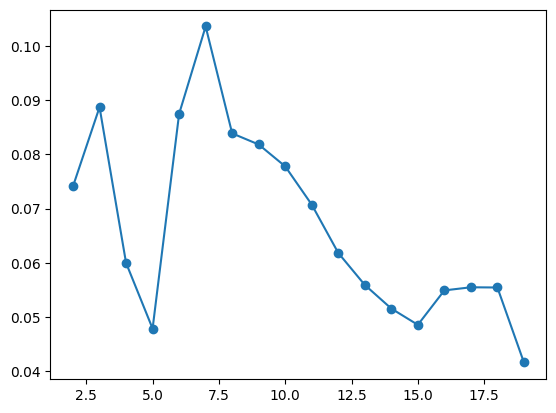

In [5]:
# Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)
silhouette(X)

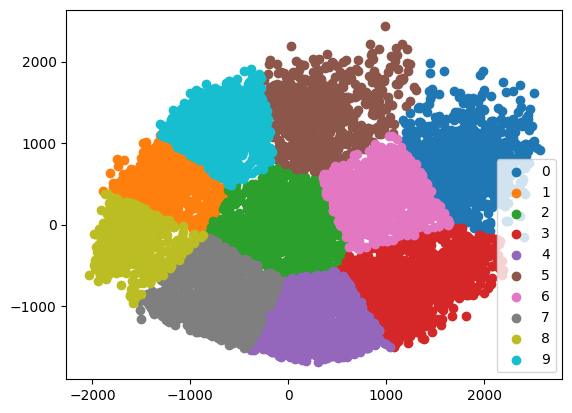

In [6]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. You can show the original ground truth labels in one plot and then the predicted clusters in another plot)
from sklearn.decomposition import PCA
pca =PCA(n_components =2)
X_new = pca.fit_transform(X)
k=10
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_new)
lab = kmeans.labels_
cent = kmeans.cluster_centers_
clusters =[[] for i in range(k)]
for i,l in enumerate(lab):
    clusters[l].append(X_new[i])
for i in range(k):
    plt.scatter((np.array(clusters[i]))[:,0],(np.array(clusters[i]))[:,1],label=i)
plt.legend()
    

## Part2: Hierarchical clustering

In [7]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
def hierarchical_clustering(X,linkage,k):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=linkage)  
    cluster.fit(X)
    lab = cluster.labels_
    clusters =[[] for i in range(k)]
    for i,l in enumerate(lab):
        clusters[l].append(X_new[i])
    for i in range(k):
        plt.scatter((np.array(clusters[i]))[:,0],(np.array(clusters[i]))[:,1],label=i)
    plt.legend()





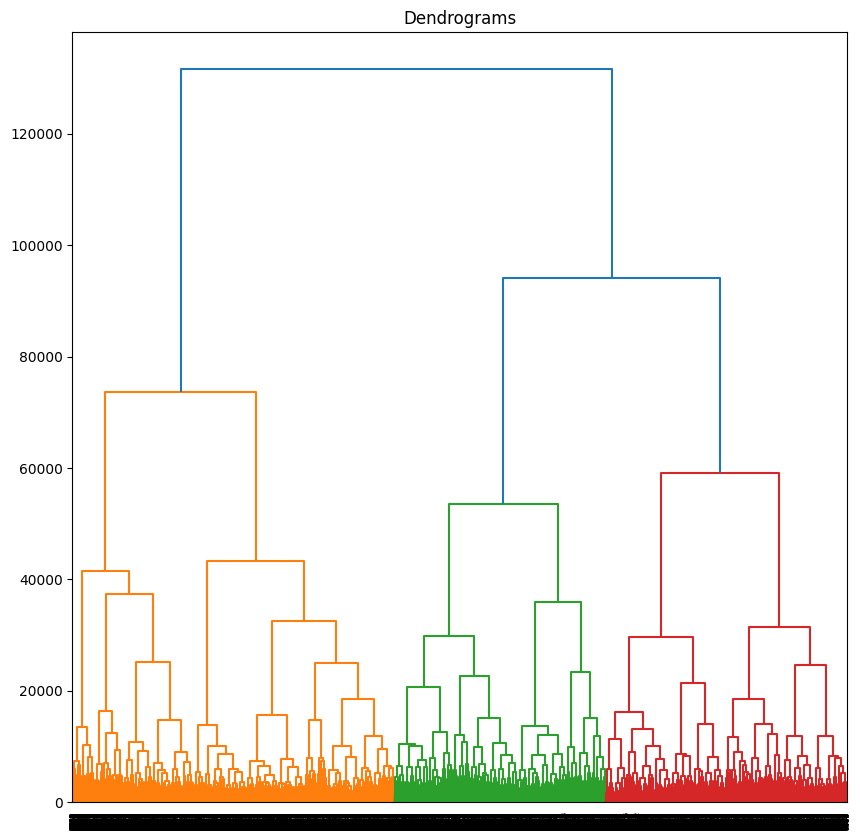

In [8]:
#visualize a dendogram

def dendogram(X):
    plt.figure(figsize=(10, 10))  
    plt.title("Dendrograms")  
    dend = sch.dendrogram(sch.linkage(X, method='ward'))

dendogram(X)
  

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: In the dendrogram, the vertical lines represent the distance between the clusters, and the horizontal lines represent the data points. We need to identify the longest vertical line that does not intersect with any other vertical line.





/home/user/anaconda3/envs/ads/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


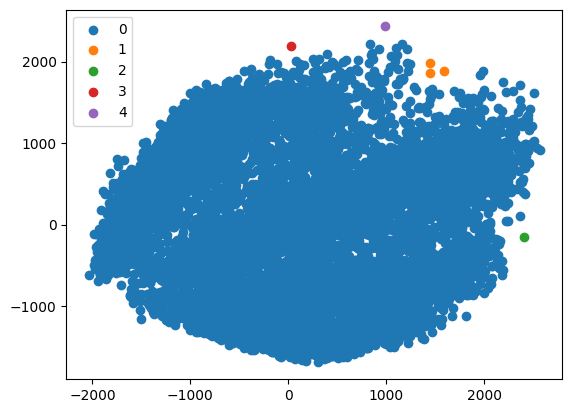

In [9]:
#visualisation of clusters using single linkage and complete linkage

hierarchical_clustering(X_new,'single',5)




/home/user/anaconda3/envs/ads/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


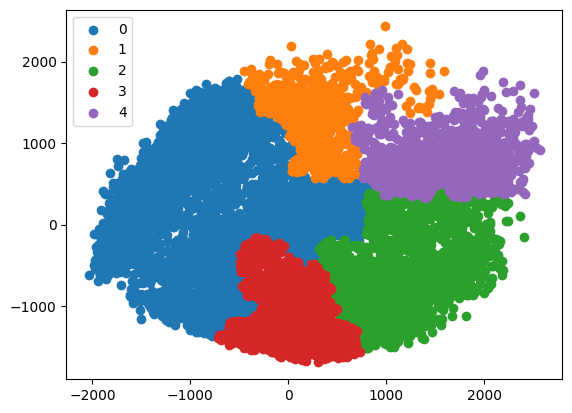

In [10]:
hierarchical_clustering(X_new,'complete',5)


**Question:** Mention the differences observed using single and complete linkage:

Answer: We can observe that the clusters obtained using complete linkage are more compact and well-separated than the clusters obtained using single linkage. This is because complete linkage measures the longest distance between two points, which tends to create more distinct clusters.

## Part3: Image Compression

(635, 640, 3)


(406400, 3)

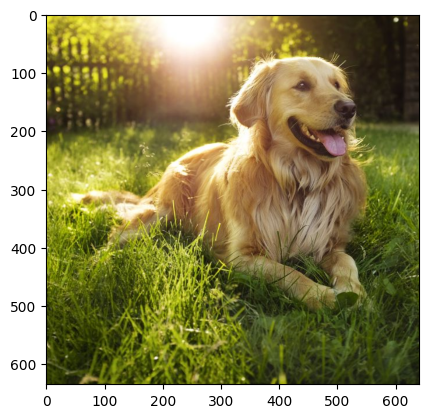

In [11]:
# Boiler plate code
import cv2
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape
plt.imshow(img)
print(img_size)
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])
X.shape

/home/user/anaconda3/envs/ads/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


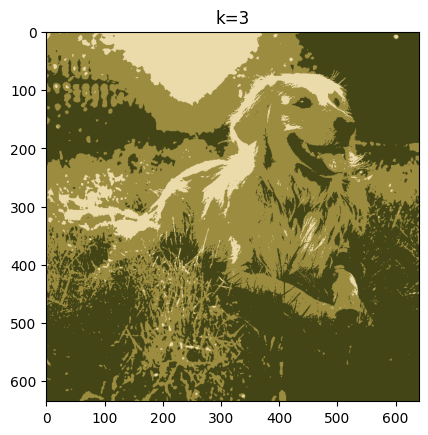

k=3, data reduction=91.66592847769029%


/home/user/anaconda3/envs/ads/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


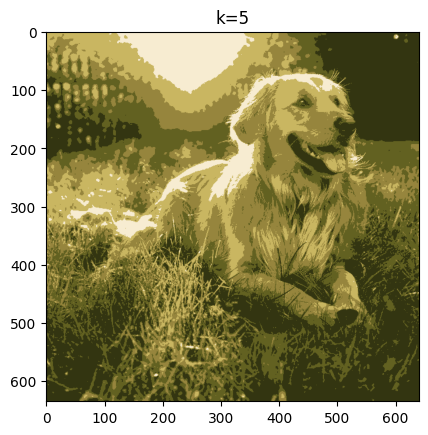

k=5, data reduction=87.49876968503936%


/home/user/anaconda3/envs/ads/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


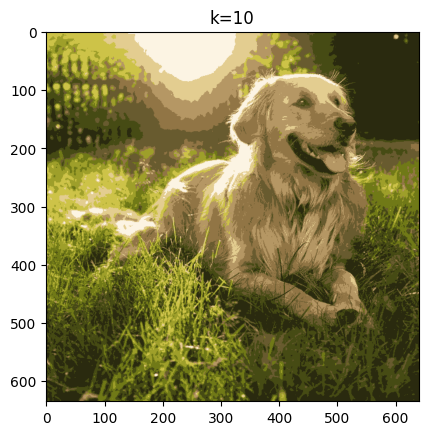

k=10, data reduction=83.33087270341207%


In [12]:
for k in [3, 5, 10]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    lab=kmeans.labels_
    cent =kmeans.cluster_centers_
    compressed_data = cent[lab]
    compressed_data = (compressed_data).astype(np.uint8)
    compressed_img_data = compressed_data.reshape((img_size[0], img_size[1], img_size[2]))

    plt.imshow(compressed_img_data)
    plt.title(f'k={k}')
    plt.show()

    original_size = img_size[0]*img_size[1]*img_size[2] * 8
    compressed_size = k * 24 + img_size[0] * img_size[1] * np.ceil(np.log2(k))
    print(f'k={k}, data reduction={ (1 - compressed_size / original_size) * 100}%')
